#**ML classification**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Capstone\Databases\ML CSV\CUDB\Refined\TCI_TCSC_MEA_STE_MAV\CUDB_refined.csv")

In [ ]:
df.shape

(3535, 6)

In [ ]:
df.isnull().sum()

TCI       282
TCSC        0
MAV         0
STE         0
MEA         0
Rhythm      0
dtype: int64

In [ ]:
df["Rhythm"].value_counts()

Rhythm
0    2786
1     749
Name: count, dtype: int64

## **Ignoring rows with NaN values**

In [ ]:
df_clean = df.dropna()
df_clean.isnull().sum()

TCI       0
TCSC      0
MAV       0
STE       0
MEA       0
Rhythm    0
dtype: int64

In [ ]:
df_clean["Rhythm"].value_counts()

Rhythm
0    2617
1     636
Name: count, dtype: int64

In [ ]:
df_clean.shape

(3253, 6)

In [ ]:
X = df_clean.iloc[:, :-1]
y = df_clean.iloc[:, -1]
X.shape

(3253, 5)

In [ ]:
y.shape

(3253,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(651, 5)
(651,)
(2602, 5)
(2602,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.feature_importances_

array([0.21712582, 0.14606676, 0.19825723, 0.24943489, 0.1891153 ])

In [ ]:
df.columns

Index(['TCI', 'TCSC', 'MAV', 'STE', 'MEA', 'Rhythm'], dtype='object')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[504,  26],
       [ 45,  76]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.890937019969278

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv = 10)

array([0.91954023, 0.86206897, 0.89230769, 0.88846154, 0.89230769,
       0.86538462, 0.86538462, 0.90769231, 0.88461538, 0.87692308])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       549
           1       0.63      0.75      0.68       102

    accuracy                           0.89       651
   macro avg       0.79      0.83      0.81       651
weighted avg       0.90      0.89      0.89       651



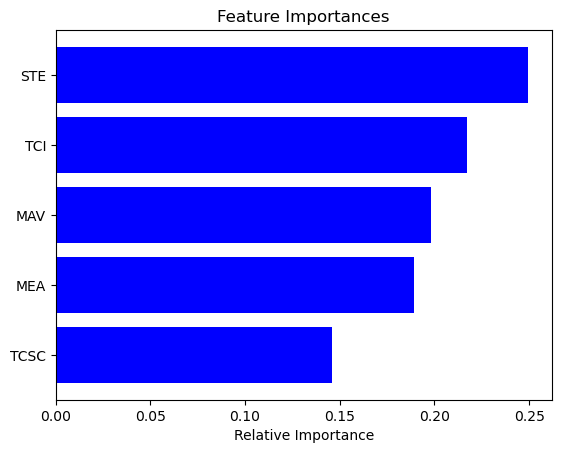

In [ ]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Igroring columns TCI and TCSC**

In [ ]:
df.columns

Index(['TCI', 'TCSC', 'MAV', 'STE', 'MEA', 'Rhythm'], dtype='object')

In [ ]:
X = df.drop(columns=['TCI','Rhythm'])

In [ ]:
X.head()

,TCSC,MAV,STE,MEA
0,5,0.520,1552.487,1346.461
1,5,0.189,1362.738,1288.883
2,4,0.251,1394.823,1285.957
3,5,0.327,1451.724,1299.368
4,5,0.270,1414.460,1293.686


In [ ]:
y = df.iloc[:, -1]

In [ ]:
y.value_counts()

Rhythm
0    2786
1     749
Name: count, dtype: int64

In [ ]:
X.shape

(3535, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(707, 4)
(707,)
(2828, 4)
(2828,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.feature_importances_

array([0.23091774, 0.25545874, 0.25909466, 0.25452886])

In [ ]:
X.columns

Index(['TCSC', 'MAV', 'STE', 'MEA'], dtype='object')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[533,  41],
       [ 61,  72]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8557284299858557

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv = 10)

array([0.8869258 , 0.8975265 , 0.85159011, 0.86572438, 0.85865724,
       0.90106007, 0.86219081, 0.83392226, 0.86524823, 0.83333333])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       594
           1       0.54      0.64      0.59       113

    accuracy                           0.86       707
   macro avg       0.73      0.77      0.75       707
weighted avg       0.87      0.86      0.86       707



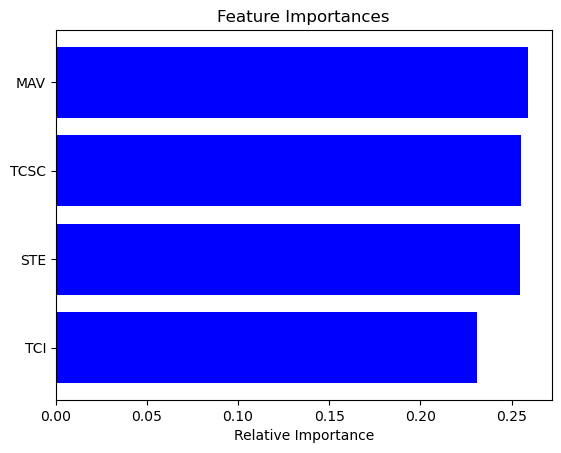

In [ ]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Taking all 5 columns, ignoring NaN rows & classifying on equal 0 & 1 Rhythms**

In [ ]:
df_clean.shape

(3253, 6)

In [ ]:
df_clean.columns

Index(['TCI', 'TCSC', 'MAV', 'STE', 'MEA', 'Rhythm'], dtype='object')

In [ ]:
# Separate the data into two classes
class_0 = df_clean[df_clean["Rhythm"] == 0]
class_1 = df_clean[df_clean["Rhythm"] == 1]

# Undersample class 0 to match the number of samples in class 1
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)

# Concatenate the undersampled class 0 with class 1
balanced_df = pd.concat([class_0_undersampled, class_1])

# Shuffle the concatenated DataFrame to mix the rows
#balanced_df = balanced_df.sample(frac=1, random_state=42)


In [ ]:
# Check the class distribution in the balanced DataFrame
print(balanced_df["Rhythm"].value_counts())

Rhythm
0    636
1    636
Name: count, dtype: int64


In [ ]:
X = balanced_df.iloc[:, :-1]
y = balanced_df.iloc[:, -1]

In [ ]:
X.shape

(1272, 5)

In [ ]:
y.value_counts()

Rhythm
0    636
1    636
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(255, 5)
(255,)
(1017, 5)
(1017,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.feature_importances_

array([0.17274466, 0.13261203, 0.1805451 , 0.27279864, 0.24129957])

In [ ]:
balanced_df.columns

Index(['TCI', 'TCSC', 'MAV', 'STE', 'MEA', 'Rhythm'], dtype='object')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [ ]:
y_pred.shape

(255,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[111,  30],
       [ 22,  92]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.796078431372549

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv = 10)

array([0.8627451 , 0.8627451 , 0.81372549, 0.76470588, 0.81372549,
       0.7745098 , 0.83333333, 0.83168317, 0.89108911, 0.81188119])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       133
           1       0.81      0.75      0.78       122

    accuracy                           0.80       255
   macro avg       0.80      0.79      0.79       255
weighted avg       0.80      0.80      0.80       255



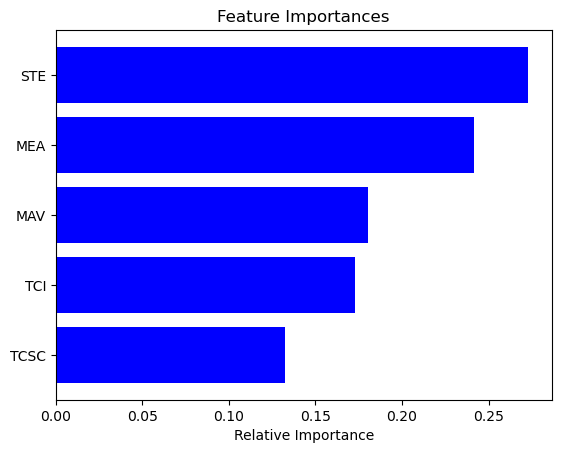

In [ ]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Ignoring TCI column and classifying on equal 0 & 1 rhythm**

In [ ]:
X = balanced_df.drop(columns=['TCI','Rhythm'])

In [ ]:
X.head()

,TCSC,MAV,STE,MEA
3488,14,0.235,1837.268,1498.479
1444,3,0.416,1406.441,1304.151
3044,7,0.453,1394.765,1292.694
1555,24,0.414,1543.845,1359.245
2646,10,0.338,1491.771,1338.410


In [ ]:
X.shape

(1272, 4)

In [ ]:
y = balanced_df['Rhythm']

In [ ]:
y.head()

3488    0
1444    0
3044    0
1555    0
2646    0
Name: Rhythm, dtype: int64

In [ ]:
y.shape

(1272,)

In [ ]:
y.value_counts()

Rhythm
0    636
1    636
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
clf.feature_importances_


array([0.20024322, 0.21389856, 0.33161988, 0.25423833])

In [ ]:
y_pred.shape


(255,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[111,  30],
       [ 19,  95]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.807843137254902

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv = 10)

array([0.85294118, 0.84313725, 0.81372549, 0.74509804, 0.83333333,
       0.7745098 , 0.82352941, 0.83168317, 0.85148515, 0.83168317])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       130
           1       0.83      0.76      0.79       125

    accuracy                           0.81       255
   macro avg       0.81      0.81      0.81       255
weighted avg       0.81      0.81      0.81       255



# **Refined**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df = pd.read_csv("D:\Capstone\Databases\ML CSV\CUDB\Refined\TCI_TCSC_MEA_STE_MAV\TCSC_MAV_STE_MEA_new_cu01-cu35.csv")

In [ ]:
df.shape

(3535, 5)

In [ ]:
# Separate the data into two classes
class_0 = df[df["rhythm"] == 0]
class_1 = df[df["rhythm"] == 1]

# Undersample class 0 to match the number of samples in class 1
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)

# Concatenate the undersampled class 0 with class 1
balanced_df = pd.concat([class_0_undersampled, class_1])

# Shuffle the concatenated DataFrame to mix the rows
#balanced_df = balanced_df.sample(frac=1, random_state=100)

In [ ]:
print(balanced_df['rhythm'].value_counts())

rhythm
0    749
1    749
Name: count, dtype: int64


In [ ]:
X = balanced_df.iloc[:, :-1]
y = balanced_df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [ ]:
X_test.shape, X_train.shape, y_test.shape , y_train.shape

((300, 4), (1198, 4), (300,), (1198,))

In [ ]:
X.columns

Index(['TCSC', 'MAV', 'STE', 'MEA'], dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.feature_importances_

array([0.25852567, 0.30010239, 0.26700248, 0.17436946])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[133,  25],
       [ 16, 126]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8633333333333333

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       149
           1       0.89      0.83      0.86       151

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



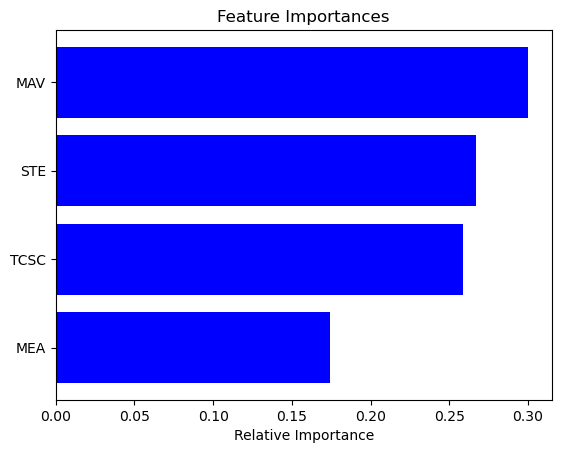

In [ ]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()